<a href="https://colab.research.google.com/github/ashwinn-v/StudentMarksPrediction/blob/main/StudentMarkPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Foundation Task 1**

In this problem we create a Supervised Machine Learning Model that could predict the marks scored by a student based on his working hours.

We use the Request HTTP library to extract data from the given URl.

In [4]:
import requests
req = requests.get("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
url_content = req.content
csv_file = open('data.csv', 'wb')

csv_file.write(url_content)
csv_file.close()


We use the pandas library to read the csv file and convert them into a DataFrame.

In [5]:
import pandas as pd
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000




   We import the numpy library for Array and Martrix operations





In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
X = data.iloc[:,0].values
X


array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [ ]:
X = X.reshape(25,1)

In [ ]:
X.shape

(25, 1)

In [ ]:
Y = data.iloc[:,1].values
Y = Y.reshape(25,1)

In [ ]:
Y.shape

(25, 1)

We use the train_test_split function call form the sklearn library to split the data into training and validation data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X_test.shape)

(5, 1)


We train our data using Linear regression.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
his = regressor.fit(X_train, y_train)

Plotting the Best Fitting line.

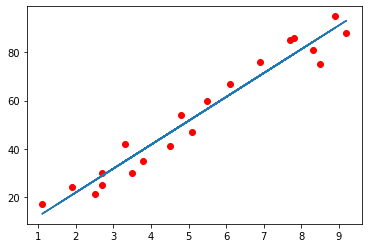

In [ ]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X_train,y_train, c = 'r')
plt.plot(X, line);
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

Calculating the error metrics.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error is :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error is : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error is : 4.183859899002982
Mean Squared Error is :  21.598769307217456
Root Mean Squared Error is :  4.647447612100373


In [ ]:
his.score(X_train, y_train)

0.9515510725211553

Predicting on a new input data.

In [ ]:
hours = 9.25
test = np.array([hours])
test = test.reshape(1, 1)
pred = regressor.predict(test)
print("No of Hours = " + format(hours))
print("Predicted Score = " + format(pred))

No of Hours = 9.25
Predicted Score = [[93.69173249]]
